# 4.19.x Final Assignment

### Assignment Instructions

1. Deadline **12/04/2023**
2. Send a zip file, containing both notebooks, to: teaching@danielegermano.me
3. Email object: **4.19.x Final Assignment Stats_ML Nome Cognome**
4. File naming: **4.19.x Final Assignment Stats_ML Nome Cognome.ipynb**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import lxml
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
food = pd.read_csv('C:/Users/USER/python/HOMEWORK/data/food_consumption.csv')
food.head()


,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [4]:
food_consumption_desc = food.groupby('food_category')['consumption'].describe()
print(food_consumption_desc)

highest_median_category = food.groupby('food_category')['consumption'].median().idxmax()
print('The category with the highest median food consumption is:', highest_median_category)


               count        mean        std   min      25%      50%       75%  \
food_category                                                                   
beef           130.0   12.123385   9.654140  0.78   4.9975    8.285   17.9400   
dairy          130.0  125.774692  93.327721  3.04  45.7925  110.975  192.7150   
eggs           130.0    8.163769   5.032582  0.16   3.9450    8.420   12.3125   
fish           130.0   17.287077  19.013508  0.24   6.0250   13.950   21.8525   
lamb_goat      130.0    2.600154   3.665252  0.00   0.5600    1.325    3.1025   
nuts           130.0    4.137231   3.372817  0.18   1.8050    3.495    5.6100   
pork           130.0   16.123692  15.717646  0.00   2.0900   10.355   28.2275   
poultry        130.0   21.219231  14.571980  0.47  10.9100   19.855   29.7475   
rice           130.0   29.375154  37.324471  0.95   4.7200   11.875   43.4425   
soybeans       130.0    0.860538   2.083336  0.00   0.0100    0.075    0.6400   
wheat          130.0   71.54

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

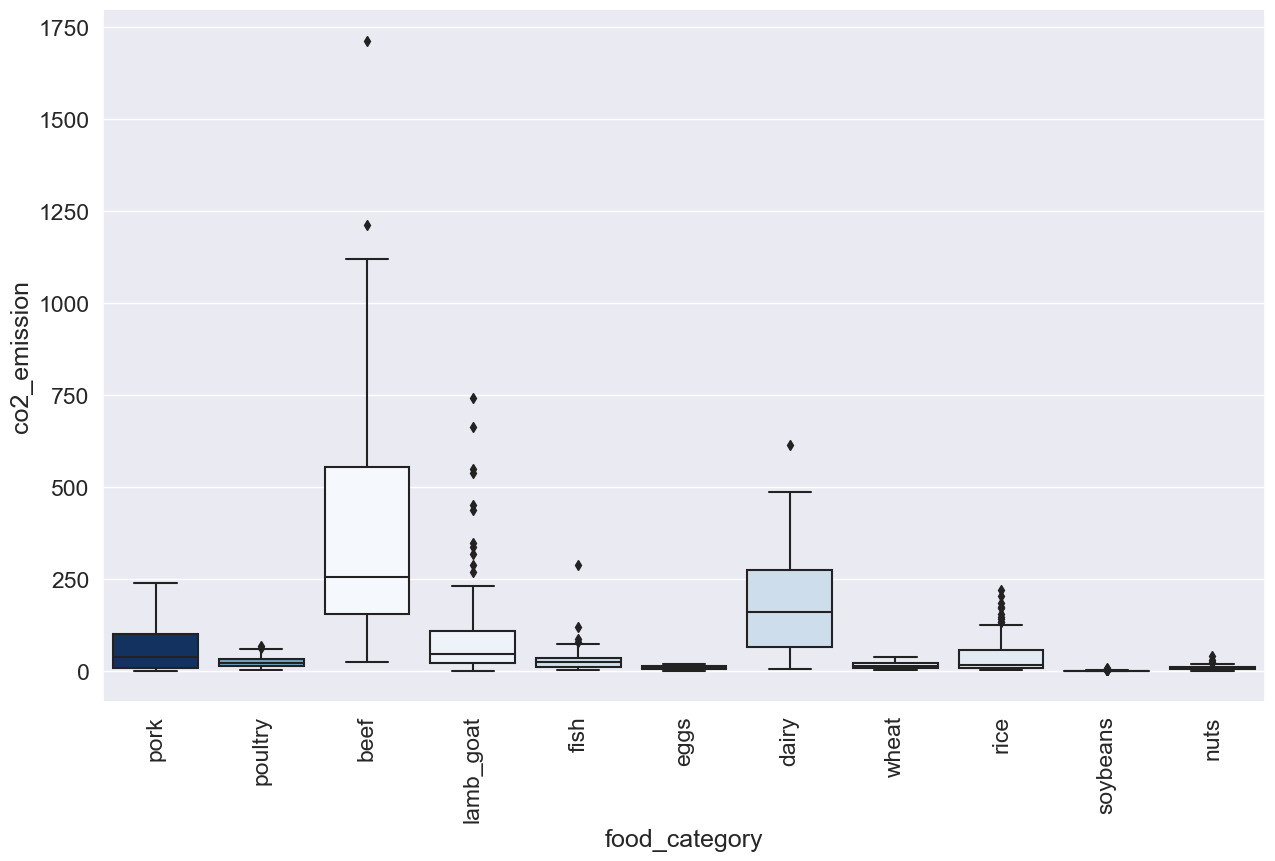

In [5]:
# Calculate IQR range for each category
iqr = food.groupby('food_category')['co2_emission'].quantile(0.75) - food.groupby('food_category')['co2_emission'].quantile(0.25)

# Create a color map based on the IQR
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(iqr.min(), iqr.max())
colors = [cmap(norm(value)) for value in iqr]

sns.boxplot(x='food_category', y='co2_emission', data=food, palette=colors)
plt.xticks(rotation=90)
plt.show()

In [6]:
q1 = food.groupby('food_category')['co2_emission'].quantile(0.25)
q3 = food.groupby('food_category')['co2_emission'].quantile(0.75)
iqr = q3 - q1
# Find the food category with the highest IQR
Highest_IQR_food_category = iqr.idxmax()
print('the food_category with the highest median co2_emission value is:',Highest_IQR_food_category)


the food_category with the highest median co2_emission value is: beef


3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

<AxesSubplot:title={'center':'co2_emission'}, xlabel='food_category'>

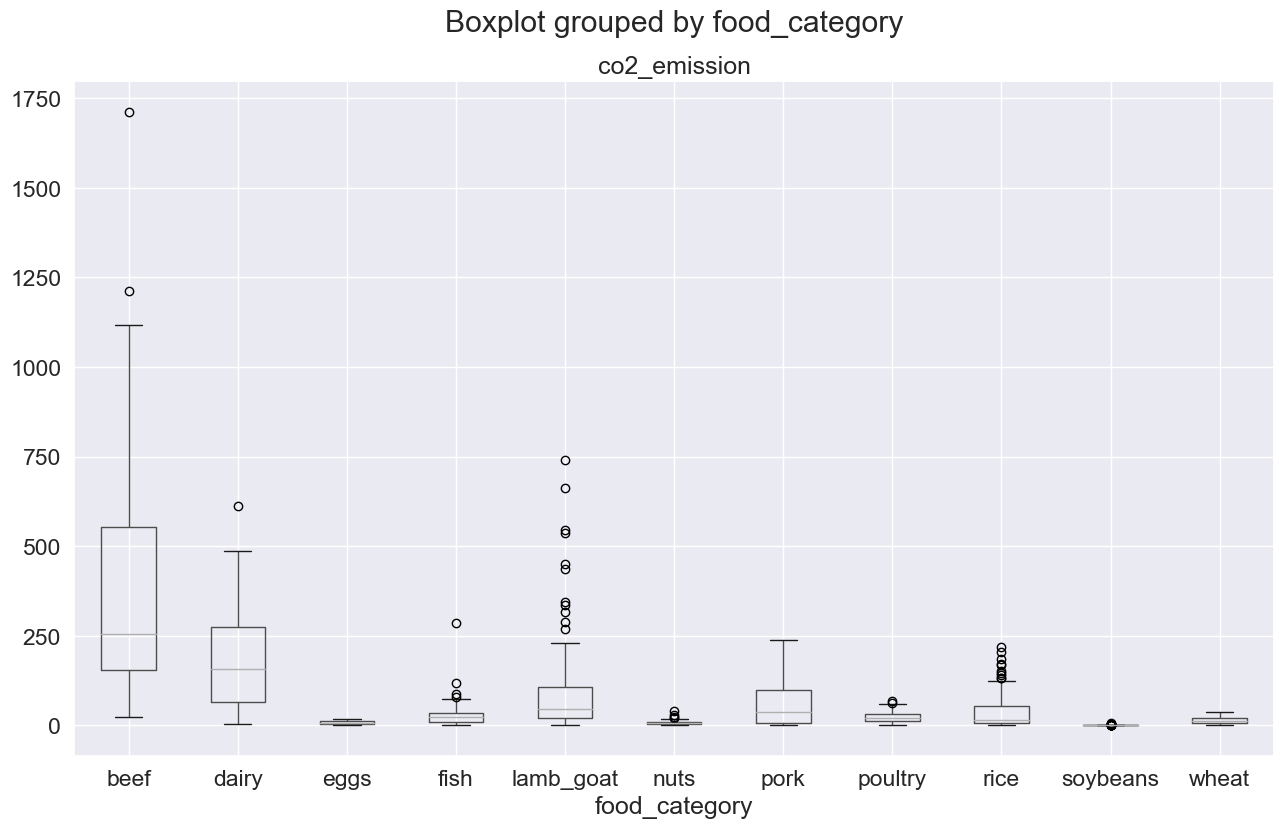

In [7]:
food.boxplot(column='co2_emission', by='food_category')

In [8]:
median_food = food.groupby('food_category')['co2_emission'].median()

# Find the food category with the highest median value
food_category_highest_median_value = median_food.idxmax()

print('the food_category with the highest median co2_emission value is:',food_category_highest_median_value)

the food_category with the highest median co2_emission value is: beef


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [9]:
# Select only the rows with food_category equal to fish or poultry
df = food[food['food_category'].isin(['fish', 'poultry'])]
# Calculate the average consumption for the selected
mean_fish = df[df['food_category'] == 'fish']['consumption'].mean()
mean_poultry = df[df['food_category'] == 'poultry']['consumption'].mean()

#Calculate the difference between the two means
statistic_test= mean_poultry - mean_fish

print(statistic_test)

3.932153846153831


In [10]:
n = 10000
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = df.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = df.loc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

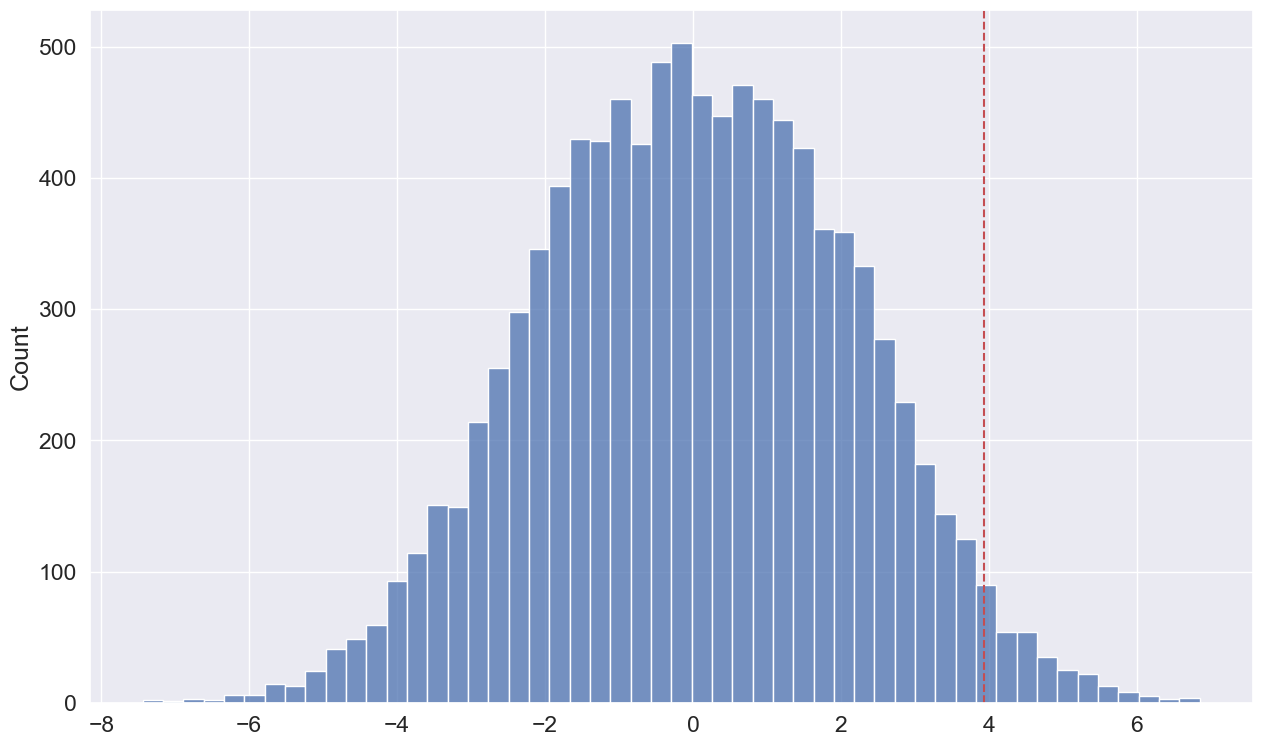

Avgerage Simulated Test Statistic: 0.0110
Initially Observed Test Statistic: 3.9322


In [11]:

sns.histplot(mu_diff_samples)
plt.axvline(statistic_test, 0, 1, color='r', linestyle='--')
plt.show()
print('Avgerage Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
print('Initially Observed Test Statistic:', f'{statistic_test:.4f}')

In [12]:
print('Results more extreme than observed:', sum([el >= statistic_test for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))
p_value = sum([el > statistic_test for el in mu_diff_samples])/n
print('p-value:', sum([el >= statistic_test for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)

Results more extreme than observed: 279
Total results: 10000
p-value: 279 / 10000 = 0.0279


In [13]:
alpha = 0.1

if p_value <= alpha: 
    print('H0 rejected: the observed result is statistically significant | p-value <= alpha')
else: 
    print('H0 accepted | the observed result is not statistically significant | p-value > alpha')

H0 rejected: the observed result is statistically significant | p-value <= alpha


### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [14]:
happy = pd.read_csv('C:/Users/USER/python/HOMEWORK/data/world_happiness.csv')
happy.head()


,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [15]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


In [16]:
happy.describe()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,142.000000,142.000000,135.000000,142.00000,143.000000,143.000000,143.000000
mean,77.352113,77.000000,73.244444,78.78169,20124.286713,73.796503,77.643357
std,45.743379,45.569058,42.237507,44.87921,20570.547556,7.092194,46.377418
min,1.000000,1.000000,1.000000,1.00000,631.000000,52.900000,0.000000
25%,37.250000,37.500000,37.500000,41.25000,4110.000000,69.100000,36.500000
50%,76.000000,75.500000,74.000000,80.50000,13000.000000,74.900000,79.000000
75%,116.750000,116.750000,109.500000,116.75000,29750.000000,79.650000,118.000000
max,155.000000,155.000000,148.000000,155.00000,113000.000000,85.100000,155.000000


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)*


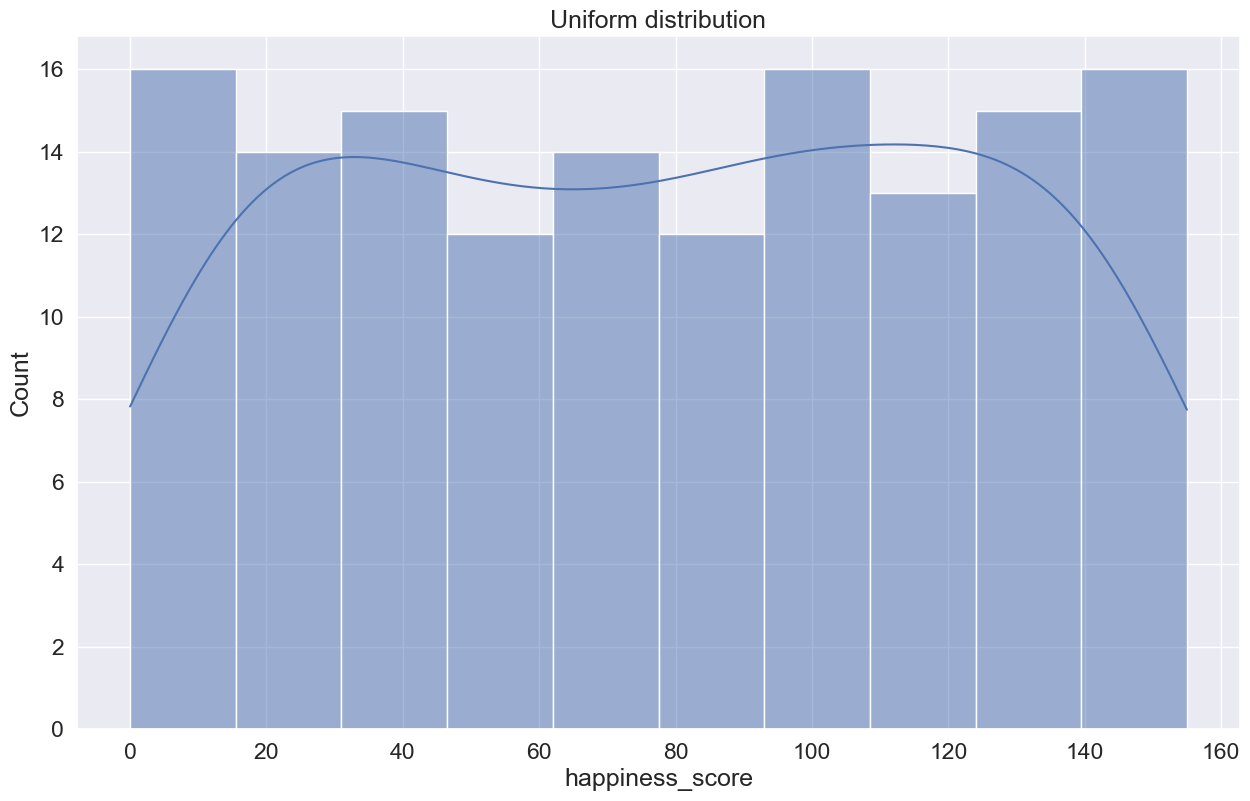

In [17]:
sns.histplot(x='happiness_score', data=happy, bins=10, kde=True)
plt.title('Uniform distribution')
plt.show()

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

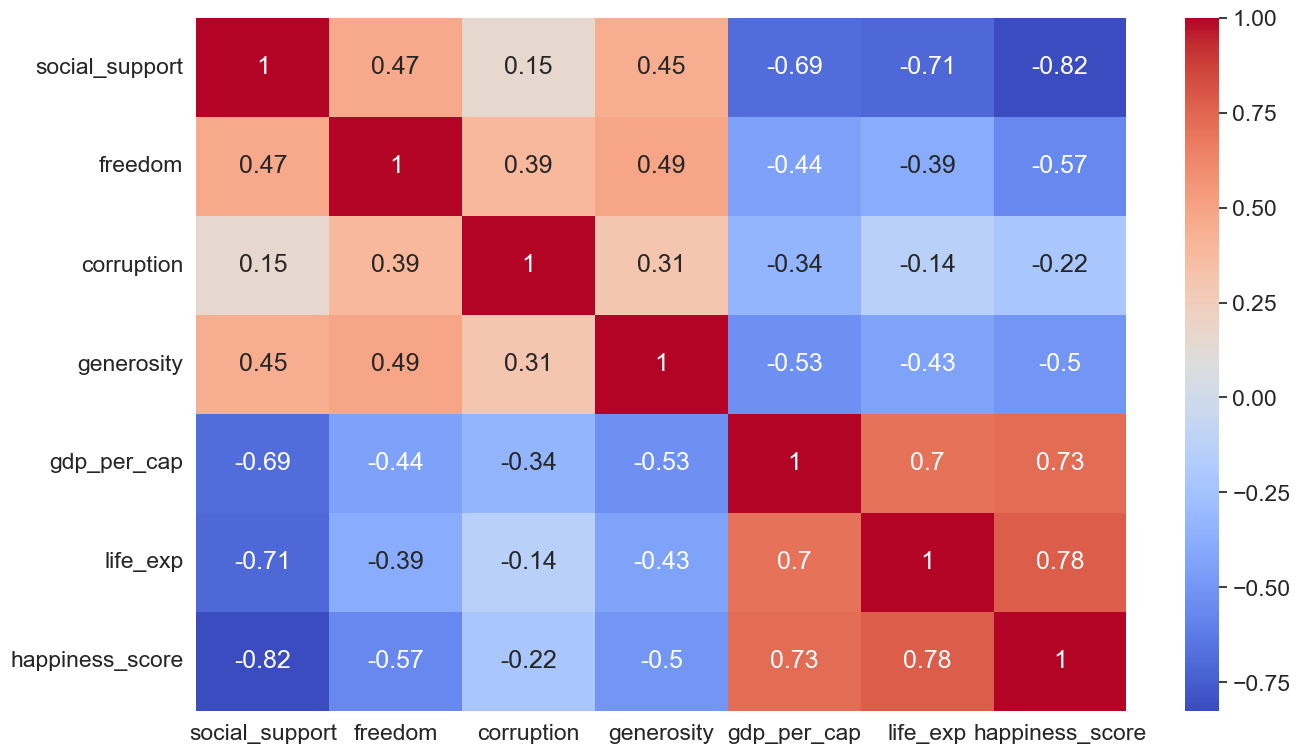

In [18]:
# Create correlation matrix
corr_matrix = happy.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
least_correlated = happy.corr()['happiness_score'].sort_values().head(1).index[0]

print(least_correlated)

social_support


7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [20]:
happy['corruption'].isnull().sum()

8

In [21]:
# Sostituire i valori mancanti nella colonna 'corruption' con la media della colonna
happy['corruption'].fillna(happy['corruption'].mean(), inplace=True)
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       143 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

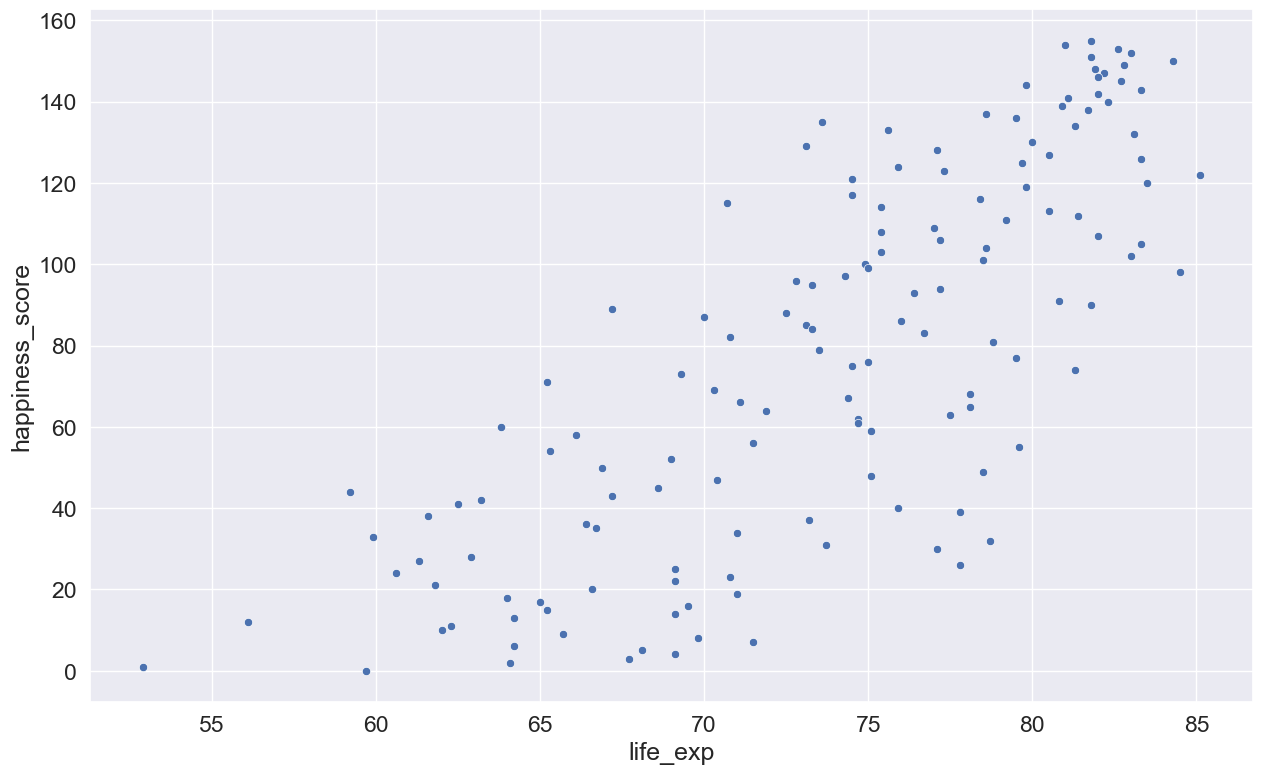

In [22]:
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
plt.show()

In [23]:
correl = happy.life_exp.corr(happy.happiness_score)
print('Correlation coefficient between X and Y:', round(correl, 2))

Correlation coefficient between X and Y: 0.78


In [24]:
import statsmodels.api as sm
Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X)  
model = sm.OLS(endog=Y,exog=X)
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.59e-30
Time:                        11:27:12   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
results_as_html = results.summary().tables[1].as_html()
results_happy = pd.read_html(results_as_html, header=0, index_col=0)[0]

intercept, slope = results_happy['coef'][0], results_happy['coef'][1]

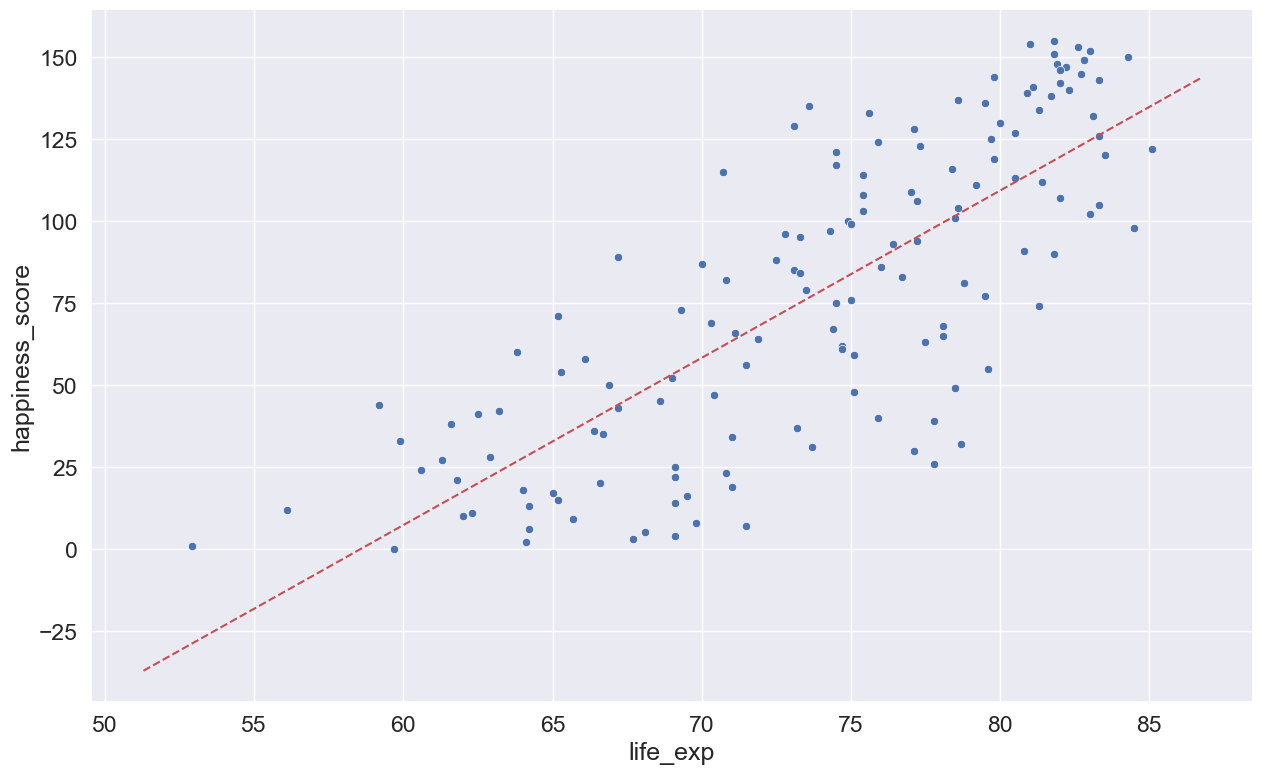

In [27]:
# plot the data points using a scatter plot
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + (slope * x_vals)   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

In [36]:
pred1 = results.predict(np.array([1, 80]))
pred2 = results.predict(np.array([1, 81]))
print('1 increase in life_exp corresponds to an increase of how many points of the happiness score variable is:', round(pred2[0], 3)-round(pred1[0], 3))

1 increase in life_exp corresponds to an increase of how many points of the happiness score variable is: 5.102000000000004


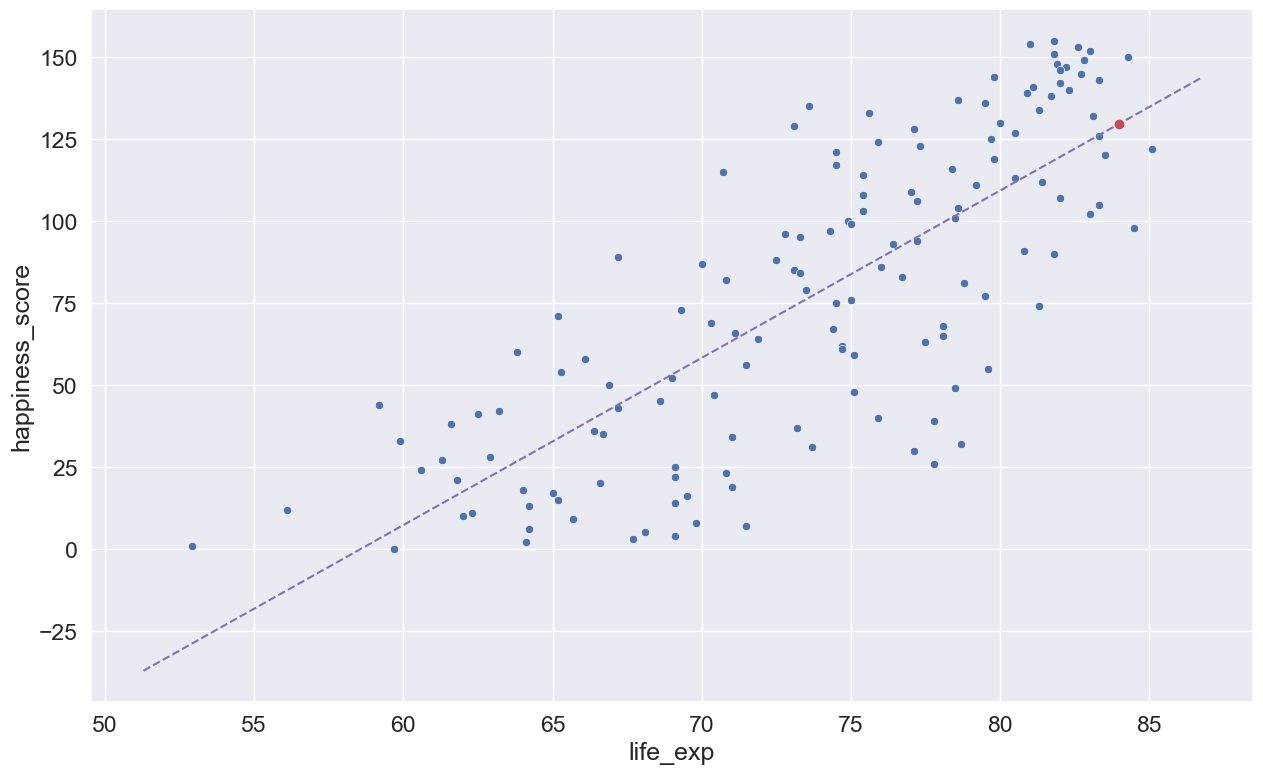

In [37]:

sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
axes = plt.gca()  
x_vals = np.array(axes.get_xlim())   
y_vals = intercept + slope * x_vals  
plt.plot(x_vals, y_vals, '--', color='m')  
plt.plot(84, results.predict(np.array([1, 84]))[0], 'ro')
plt.show()

In [38]:
#Generate new  random obs
#new_happiness_score = np.random.normal(np.mean(happy.happiness_score), 15, 10)
#new_happiness_score

new_happiness_score = np.random.randint(55,85,10)
new_happiness_score

array([65, 82, 66, 60, 81, 64, 72, 64, 62, 59])

In [39]:
#Generate new prediction
results.predict(np.column_stack((np.ones(10), new_happiness_score)))

array([ 32.76304576, 119.49810877,  37.86510829,   7.25273311,
       114.39604624,  27.66098323,  68.47748347,  27.66098323,
        17.45685817,   2.15067058])

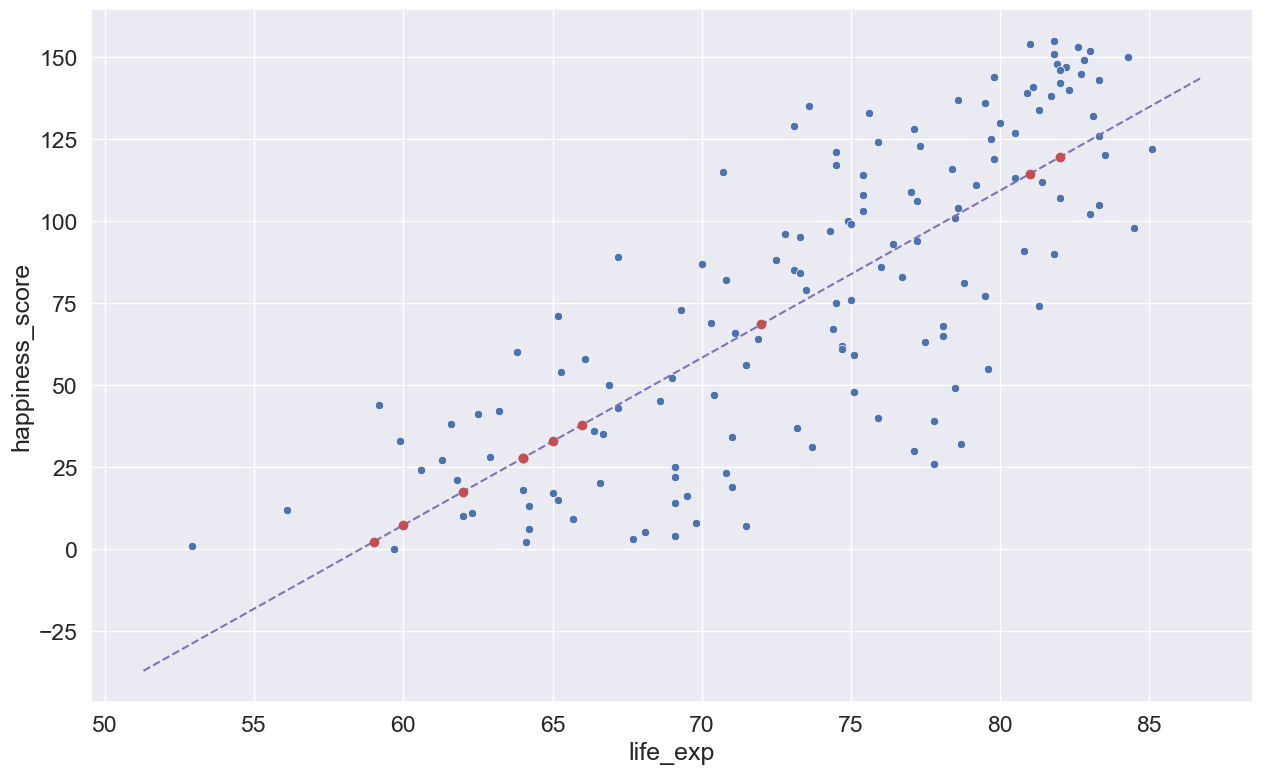

In [40]:
# plot the original dataset
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

# plot the regression line
axes = plt.gca()   
x_vals = np.array(axes.get_xlim())   
y_vals = intercept + slope * x_vals  
plt.plot(x_vals, y_vals, '--', color='m')   

# plot the new observed x-values and the relative predictions
for x, y in zip(new_happiness_score, results.predict(np.column_stack((np.ones(10), new_happiness_score)))): 
    plt.plot(x, y, 'ro')

plt.show()

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [41]:
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [42]:
from sklearn.model_selection import train_test_split
Happiness_pred = happy['happiness_score']
Happy_pred = happy[['social_support','freedom', 'generosity','life_exp']]
Happy_pred = sm.add_constant(data=Happy_pred)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Happy_pred,Happiness_pred, test_size=0.33, random_state=42)

In [44]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.39e-29
Time:                        11:32:44   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""






























10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answer.** Are you satisfyied with the model's performance?

In [46]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [47]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

Naïve Training MAE: 40.38
Training MAE: 16.92


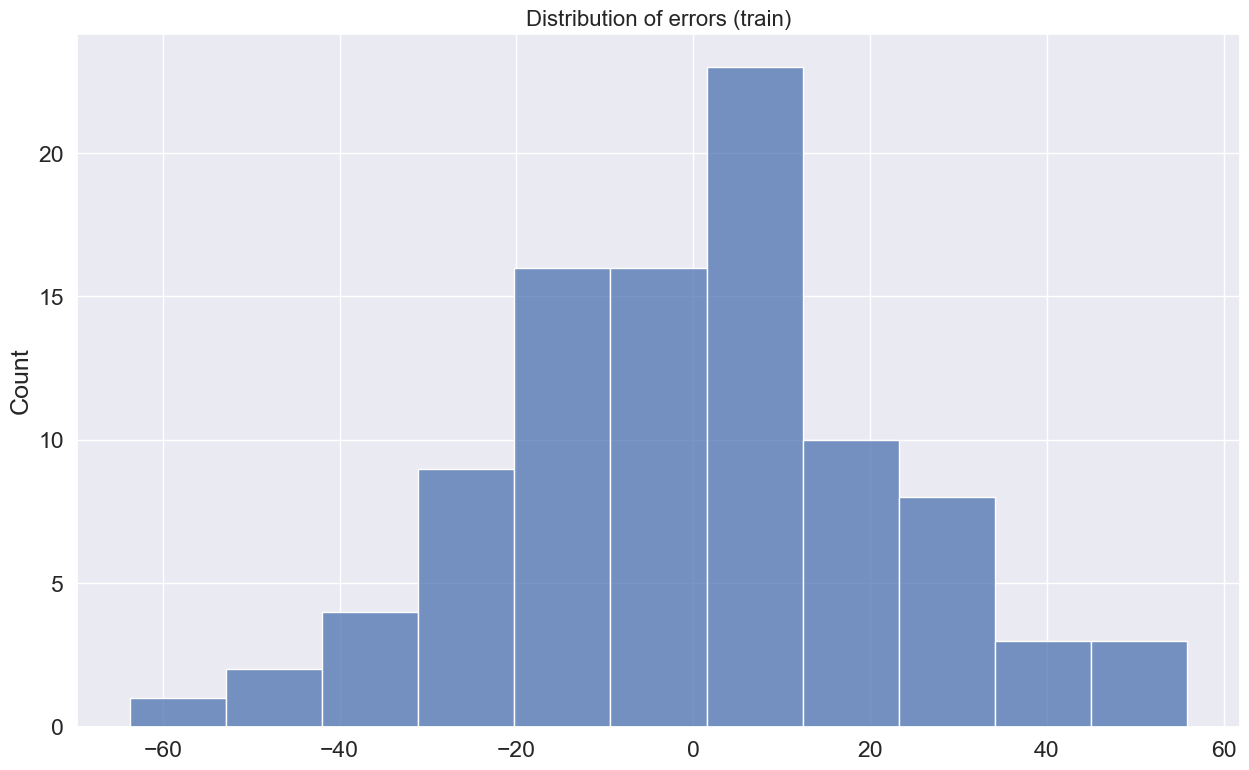

In [48]:
sns.histplot(y_train - pred_train).set_title("Distribution of errors (train)", size=16)
plt.show()

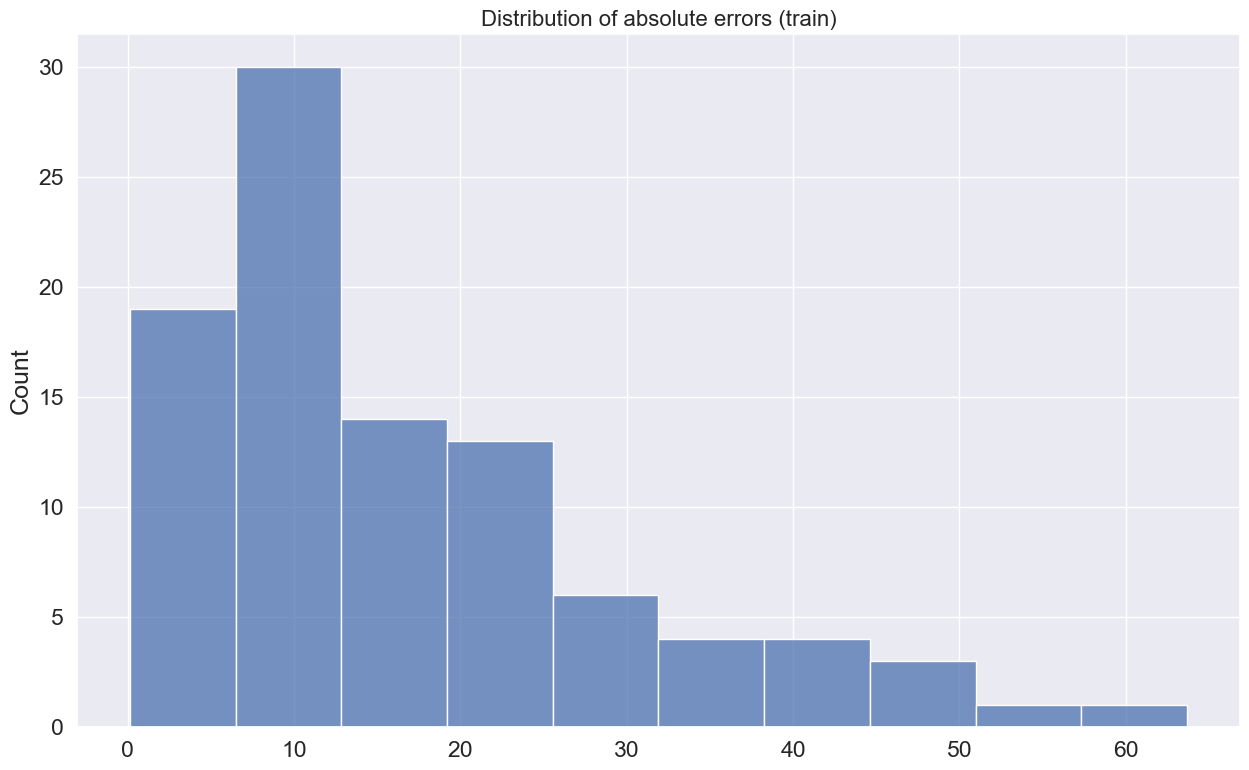

In [49]:
sns.histplot(np.abs(y_train - pred_train)).set_title("Distribution of absolute errors (train)", size=16)
plt.show()

In [50]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 39.94
Testing MAE: 17.12


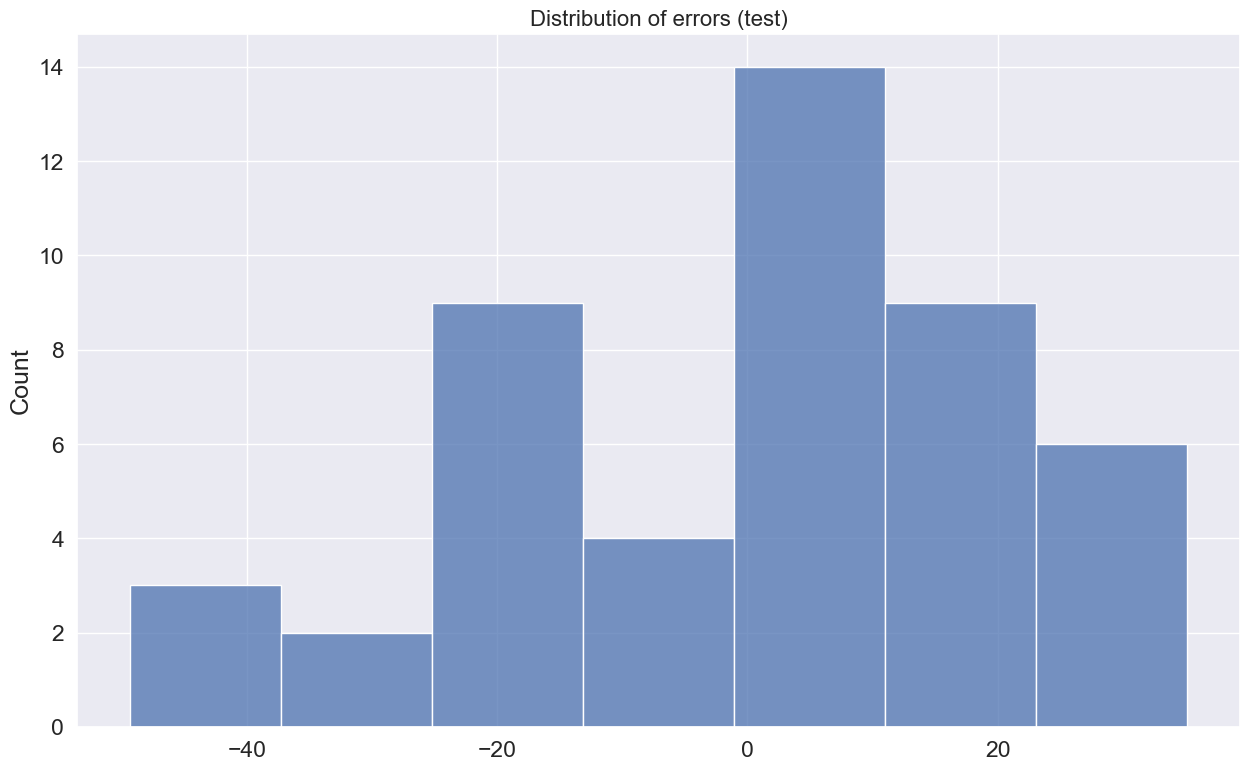

In [51]:
sns.histplot(y_test - pred_test).set_title("Distribution of errors (test)", size=16)
plt.show()

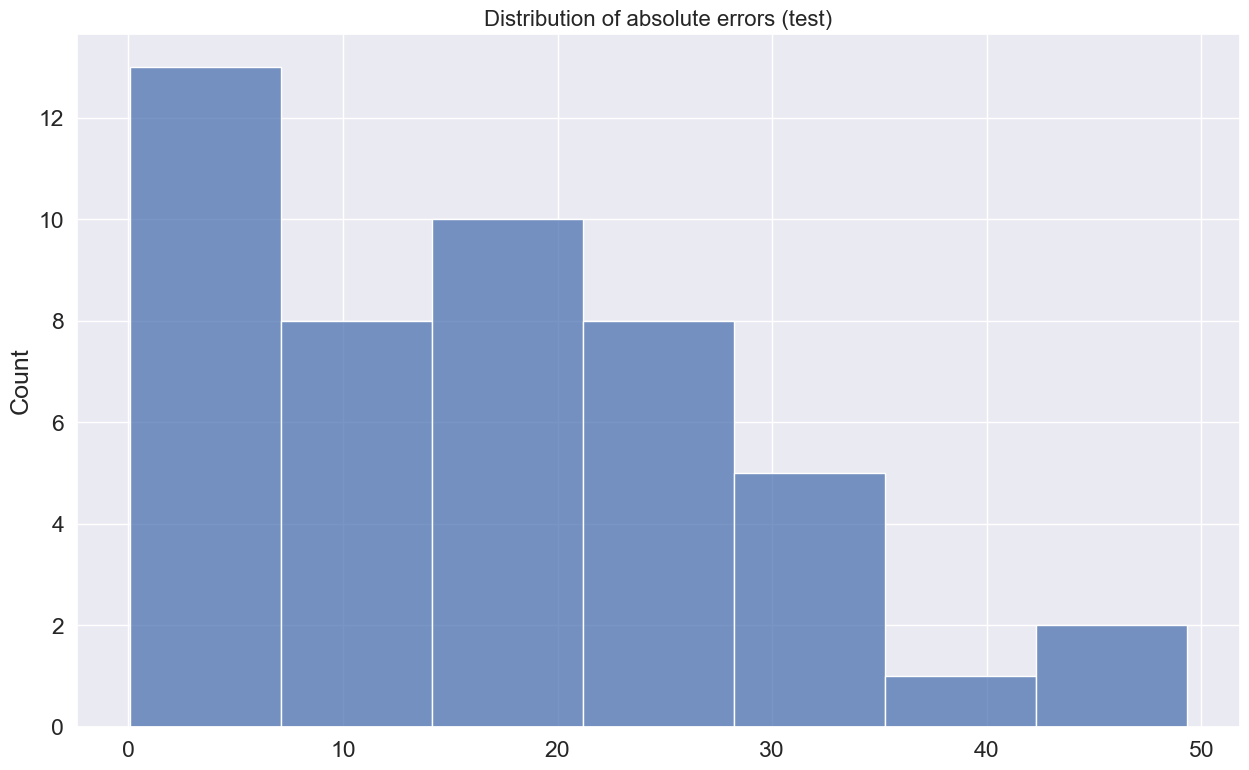

In [52]:
sns.histplot(np.abs(y_test - pred_test)).set_title("Distribution of absolute errors (test)", size=16)
plt.show()

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?**

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

In [ ]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)